In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses/udemy_courses.csv


In [17]:
courses = pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv')
courses.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [18]:
# creating a new column count which we'll use later in aggregate functions
# created a copy of 'courses' dataframe in 'demo'
demo = courses.copy()
demo['count']=1
demo.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,count
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,1
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,1


# Creating some lists which I'll use later

In [19]:
# list of subjects
subject_list = list(demo['subject'].unique())

# creating fontdictionary for title of plots
font_title={'fontfamily':'monospace','fontweight':'bold','fontsize':20}

# creating fontdictionary for labels of plots
font_label={'fontfamily':'monospace', 'fontsize':12}

# Comparing no. of courses in each subject

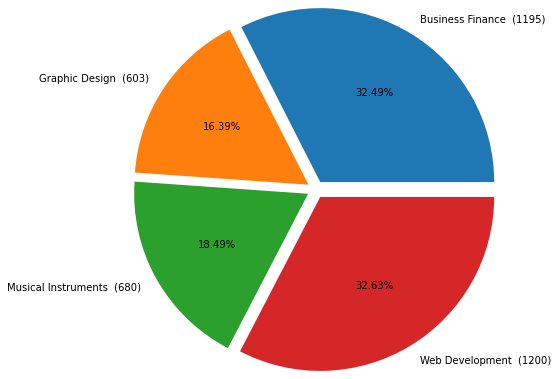

In [20]:
# calculating no. of courses in each subject
course_count = demo.groupby(['subject']).count()['count']

subject_course_count = list(zip(subject_list, course_count))
#print(subject_course_count)

#calculating labels 
labels=[]
for course in subject_course_count:
    labels.append(str(course[0])+'  ('+str(course[1])+')')

#plotting a pie chart
explode=[0.1]*4
plt.pie(course_count, labels=labels, autopct='%.2f%%', radius=2, explode=explode)

plt.show()

# Number of subscribers in each subject

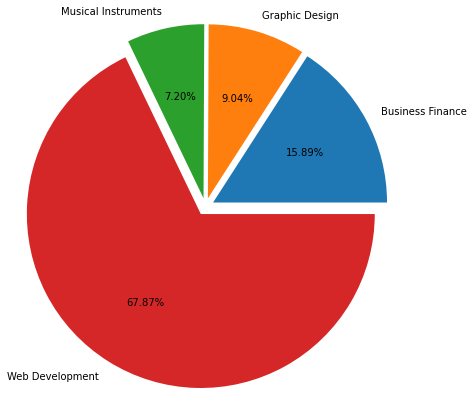

In [21]:
subscriber_count = demo.groupby(['subject']).sum()['num_subscribers']

plt.pie(subscriber_count, labels=subject_list, radius=2, autopct='%.2f%%', explode=explode)
plt.show()

# Best Free course in each subject
## based on no. of subscribers and no. of reviews

In [22]:
best_courses = pd.DataFrame(columns=demo.columns)

for subject in subject_list:
    data =demo.loc[(demo.subject==subject) & (demo.is_paid==False)]
    data = data.sort_values(by=['num_subscribers', 'num_reviews'], ascending=False).head(1)
    
    best_courses = pd.concat([best_courses, data])
    
# rearranging columns   
cols = list(demo.columns)
best_courses = best_courses[[cols[-2]]+cols[1:3]+cols[4:7]+[cols[9]]]

best_courses

,subject,course_title,url,price,num_subscribers,num_reviews,content_duration
492,Business Finance,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0,65576,936,8.0
1461,Graphic Design,Photoshop In-Depth: Master all of Photoshop's ...,https://www.udemy.com/photoshop-tools/,0,53851,1779,4.5
1896,Musical Instruments,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,0,101154,1042,4.5
2827,Web Development,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,10.5


# Courses uploaded each year between 2011-2017

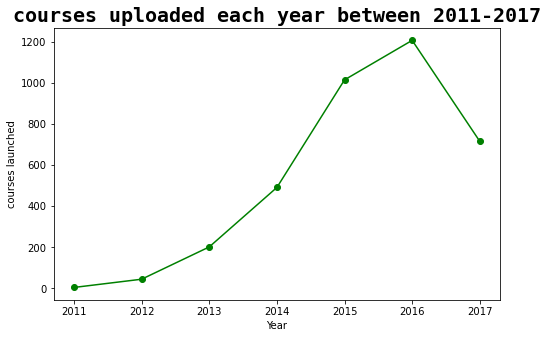

In [23]:
# creating a 'year' column, which indicates year in which course was published
demo['year']=demo['published_timestamp'].str[0:4]

bins =[2011,2012,2013,2014,2015,2016,2017]

year_count = demo.groupby(['year']).sum()['count']

# plotting a line graph for this 'year' data
plt.figure(figsize=(8,5))
plt.plot(bins, year_count, 'go-', )

plt.title('courses uploaded each year between 2011-2017', fontdict =font_title)
plt.xlabel('Year')
plt.ylabel('courses launched')
plt.show()



# No. of subscribers enrolled in different levels of courses

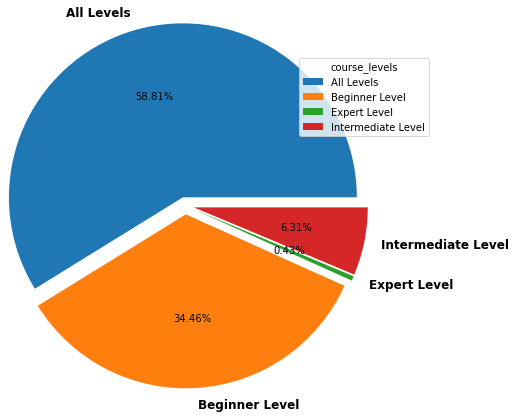

In [24]:
# no. of subscribers in each level
subs_in_levels = demo.groupby('level').sum()['num_subscribers']
# types of levels
level_names = demo['level'].sort_values().unique()

# plotting pie chart 

explode =[0.1]*4

wedges,texts, autotexts =plt.pie(subs_in_levels, labels=level_names, radius=2, explode=explode, autopct='%.2f%%')

plt.legend(wedges, level_names, title="course_levels", loc="center left", bbox_to_anchor=(1, 0, 2, 2))
          
          
plt.setp(texts, size=12, weight="bold")
plt.show()

#print(subs_in_levels)
#print(subs)

# No. of courses classified according to content_duration

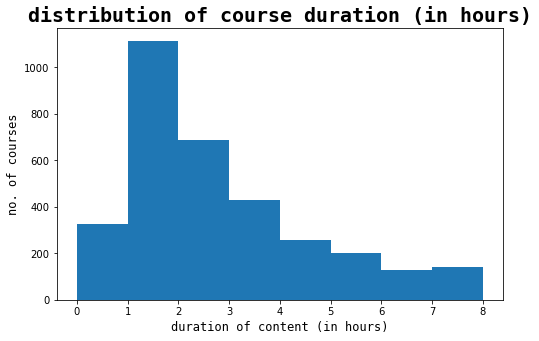

In [25]:
demo['content_duration'].dtypes # checking datatype of content_duration (its 'float64')

demo.loc[demo.index == demo['content_duration'].idxmin()]['content_duration']

# max duration is 7.5
# min duration is 0

bins =[0,1,2,3,4,5,6,7,8]

#plotting distribution
plt.figure(figsize=(8,5))

plt.title('distribution of course duration (in hours)',fontdict=font_title )

plt.hist(demo['content_duration'], bins=bins )
plt.xticks(bins)

plt.xlabel("duration of content (in hours)", fontdict=font_label)
plt.ylabel("no. of courses", fontdict =font_label)

plt.show()


# Least reviewed courses in each subject

In [26]:
# a new dataframe to store courses having least(i.e. zero) reviews
least_reviewed =pd.DataFrame(columns = demo.columns)

for subject in subject_list:
    data = demo.loc[(demo.subject ==subject) & (demo.num_reviews ==0)]
    #data = data.loc[data.index == data['num_reviews'].idxmin()]
    least_reviewed = pd.concat([least_reviewed,data])
    
least_reviewed

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,count,year
213,1266148,Preparation of Consolidated Financial Statemen...,https://www.udemy.com/preparation-of-consolida...,False,0,965,0,18,Intermediate Level,1.500000,2017-06-28T20:37:13Z,Business Finance,1,2017
256,831940,Fundamentals of Accounting for Business Owners,https://www.udemy.com/fundamentals-of-accounti...,True,20,217,0,47,Beginner Level,2.500000,2017-02-06T16:35:44Z,Business Finance,1,2017
379,1273896,Covered Calls - Powerful Income Strategy for S...,https://www.udemy.com/covered-calls-income-str...,True,60,22,0,8,Beginner Level,1.000000,2017-07-03T15:13:33Z,Business Finance,1,2017
405,1249164,Corporate Internal Controls and Fraud Controls,https://www.udemy.com/corporate-internal-contr...,True,50,1,0,12,Intermediate Level,2.000000,2017-06-29T17:27:52Z,Business Finance,1,2017
408,889066,Trading Options Basics,https://www.udemy.com/trading-options-basics/,True,200,8,0,8,Beginner Level,1.500000,2016-07-01T03:13:22Z,Business Finance,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,810550,Effective Personal Website Building and Hosting,https://www.udemy.com/effective-personal-websi...,True,20,4259,0,11,All Levels,1.000000,2016-04-11T22:36:52Z,Web Development,1,2016
2645,1277924,Angular 4 Front To Back,https://www.udemy.com/angular-4-front-to-back/,True,40,44,0,68,All Levels,8.500000,2017-07-06T15:04:55Z,Web Development,1,2017
3580,969170,XSD :basics for beginners,https://www.udemy.com/xsd-basics-for-beginners/,True,35,755,0,7,All Levels,0.700000,2016-09-27T18:01:26Z,Web Development,1,2016
3626,969348,AppML :basics for beginners,https://www.udemy.com/appml-basics-for-beginners/,True,30,770,0,8,All Levels,0.633333,2016-09-27T18:41:31Z,Web Development,1,2016


# yearwise most popular courses
### again, based on no. of subscribers and no. of reviews

In [27]:
best_courses = pd.DataFrame(columns=demo.columns)

years= demo['year'].sort_values().unique()

for year in years:
    data =demo.loc[demo.year== year ]
    data = data.sort_values(by=['num_subscribers', 'num_reviews'], ascending=False).head(1)
    best_courses = pd.concat([best_courses, data])
    
# rearranging columns   
cols = list(demo.columns)
best_courses = best_courses[[cols[-1]]+cols[10:12]+cols[1:4]+cols[5:7]]

best_courses

,year,published_timestamp,subject,course_title,url,is_paid,num_subscribers,num_reviews
2701,2011,2011-11-19T21:51:20Z,Web Development,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,True,69186,2408
1896,2012,2012-06-15T17:00:33Z,Musical Instruments,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,101154,1042
2827,2013,2013-02-14T07:03:41Z,Web Development,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,268923,8629
2783,2014,2014-04-08T16:21:30Z,Web Development,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,120291,5924
3230,2015,2015-11-02T21:13:27Z,Web Development,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,121584,27445
3232,2016,2016-03-08T22:28:36Z,Web Development,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,114512,22412
1211,2017,2017-01-23T00:20:05Z,Graphic Design,The Ultimate Drawing Course - Beginner to Adva...,https://www.udemy.com/the-ultimate-drawing-cou...,True,26742,2379


# Descriptive statistics of udemy_courses data
* average course price is : 66.0494
* average no. of subscribers for each course : 3197
* average reviews per course: 156
* average no. of lectures per course: 40
* average duration of course: 4.09 hrs

In [28]:
avg_data= demo[['price','num_subscribers','num_reviews','num_lectures','content_duration']].mean()
avg_data

price                 66.049483
num_subscribers     3197.150625
num_reviews          156.259108
num_lectures          40.108755
content_duration       4.094517
dtype: float64